In [1]:
#importing libraries 

import numpy as np 
import pandas as pd 
import os
import cv2

# Labels

In [5]:
labels = os.listdir('train')

In [6]:
labels

['Closed', 'no_yawn', 'yawn', 'Open']

# Visualize A Closed and Open eye image

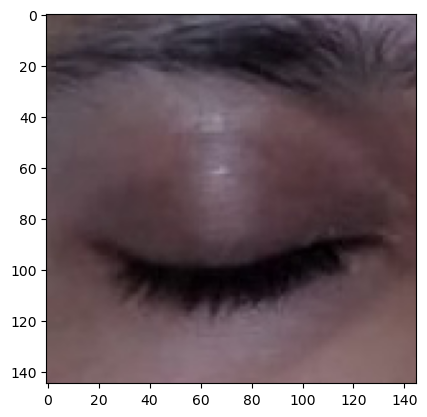

In [9]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("train/Closed/_0.jpg"))

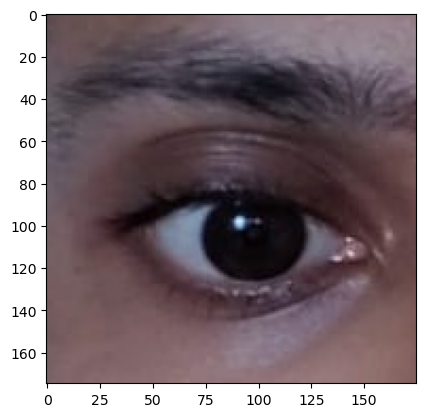

In [10]:
plt.imshow(plt.imread("train/Open/_0.jpg"))

# Image Array

In [12]:
a = plt.imread("train/yawn/10.jpg")

In [13]:
a

array([[[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [157, 165, 178],
        [156, 164, 177],
        [156, 164, 177]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [155, 163, 176],
        [155, 163, 176],
        [155, 163, 176]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [154, 162, 175],
        [154, 162, 175],
        [155, 163, 176]]

# Image Shape

In [14]:
a.shape

(480, 640, 3)

# Visualize a Yawn and non_Yawn Image

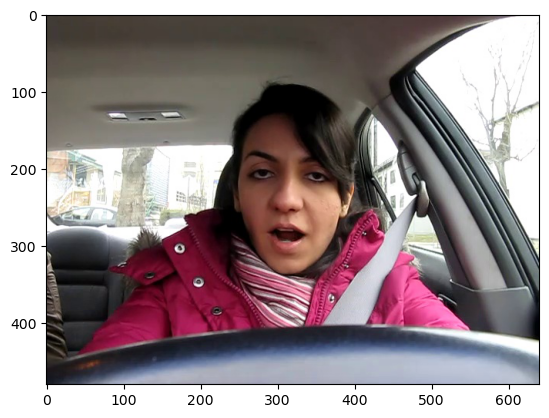

In [15]:
plt.imshow(plt.imread("train/yawn/10.jpg"))

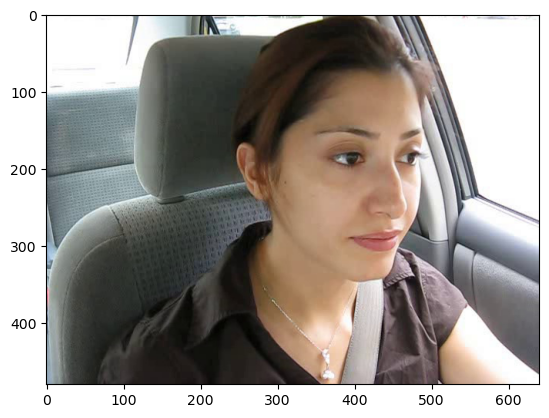

In [17]:
plt.imshow(plt.imread("train/no_yawn/4.jpg"))

# Take only face(For yawn and not_yawn)

In [19]:
def face_for_yawn(direc="train", face_cas_path="data/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


# For Closed and Open eye

In [20]:
def get_data(dir_path="train", face_cas="data/haarcascade_frontalface_default.xml", eye_cas="haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [26]:
data_train = get_data()

2
3


# Extend data and Convert array

In [37]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no,dtype='object')

# New variable to store

In [38]:
new_data = append_data()

0
1
2
3


# Separate label and features

In [39]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

# Reshape the Array

In [40]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

# LabelBinarizer

In [41]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

# Label array

In [42]:
y = np.array(y)

# Train Test split

In [43]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# Length of X_test

In [44]:
len(X_test)

578

# Import some dependencies

In [45]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Data Augmentation

In [46]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)


#train_generator = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#test_generator = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model

In [48]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(145,145,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 71, 71, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0

In [49]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
43/43 [==============================] - 60s 1s/step - loss: 1.3200 - accuracy: 0.4091 - val_loss: 1.2641 - val_accuracy: 0.3789
Epoch 2/50
43/43 [==============================] - 58s 1s/step - loss: 0.7616 - accuracy: 0.6756 - val_loss: 0.3976 - val_accuracy: 0.8512
Epoch 3/50
43/43 [==============================] - 58s 1s/step - loss: 0.4183 - accuracy: 0.8211 - val_loss: 0.4139 - val_accuracy: 0.8391
Epoch 4/50
43/43 [==============================] - 59s 1s/step - loss: 0.3457 - accuracy: 0.8500 - val_loss: 0.3227 - val_accuracy: 0.8806
Epoch 5/50
43/43 [==============================] - 59s 1s/step - loss: 0.3025 - accuracy: 0.8731 - val_loss: 0.2756 - val_accuracy: 0.8945
Epoch 6/50
43/43 [==============================] - 59s 1s/step - loss: 0.2899 - accuracy: 0.8879 - val_loss: 0.3585 - val_accuracy: 0.8391
Epoch 7/50
43/43 [==============================] - 61s 1s/step - loss: 0.2715 - accuracy: 0.8983 - val_loss: 0.3005 - val_accuracy: 0.8824
Epoch 8/50
43/43 [==

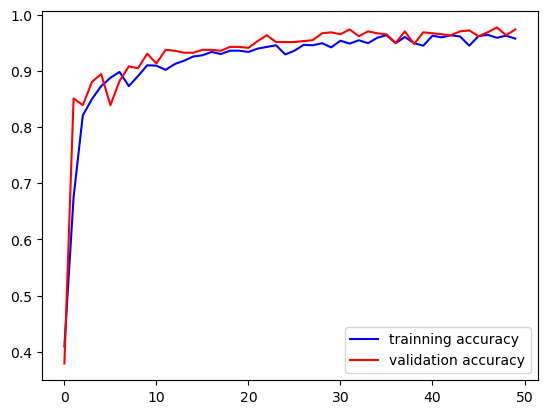

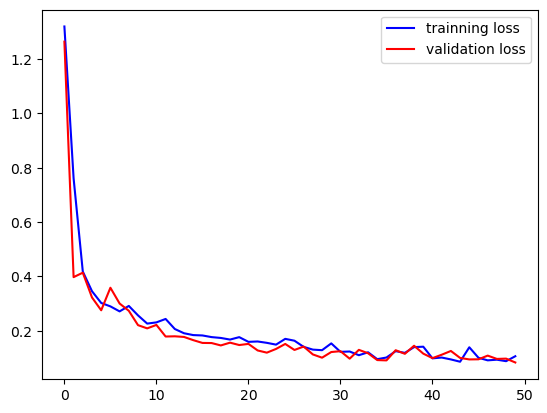

In [50]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# Save Model

In [61]:
model.save("drowiness_detect.h5")

/Users/keshabkamal/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
model.save("drowiness_detect.model")

INFO:tensorflow:Assets written to: drowiness_detect.model/assets


INFO:tensorflow:Assets written to: drowiness_detect.model/assets


# Prediction

In [2]:
prediction = model.predict(X_test)

NameError: name 'model' is not defined

In [1]:
prediction

NameError: name 'prediction' is not defined